In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.applications.mobilenet_v2 import MobileNetV2

In [3]:
train='/content/drive/MyDrive/machin/PandasBears/Train'
test='/content/drive/MyDrive/machin/PandasBears/Test'

In [4]:
input_shape = (224, 224, 3)

In [5]:
base_model=MobileNetV2(
    weights='imagenet',
    input_shape=input_shape,
    include_top=False
)

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(base_model)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 7, 7, 128)         163968    
                                                                 
 dropout (Dropout)           (None, 7, 7, 128)         0         
                                                                 
 dense_1 (Dense)             (None, 7, 7, 256)         33024     
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 256)         0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                        

In [9]:
base_model.trainable=False

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_set=train_datagen.flow_from_directory(
                                      train,
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='binary'
                                        )

Found 500 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory(
                                      test,
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='binary'
                                        )

Found 100 images belonging to 2 classes.


In [15]:
class_name=['Bears','Pandas']

In [16]:
class_name

['Bears', 'Pandas']

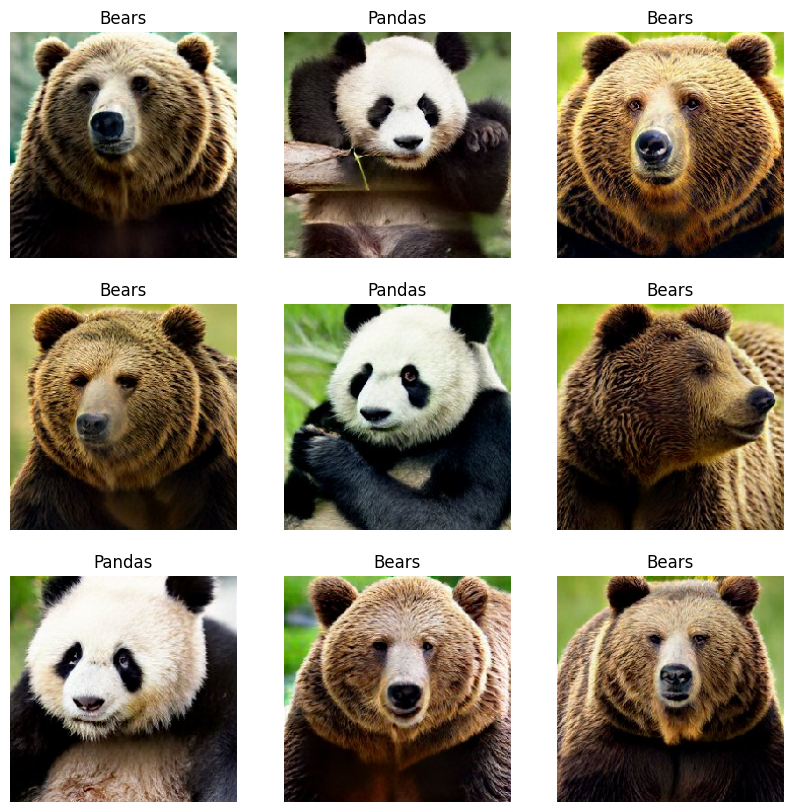

In [17]:

images, labels = next(train_set)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_name[int(labels[i])])
    plt.axis('off')
plt.show()


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit_generator(train_set,epochs=10,validation_data=test_set)

<ipython-input-19-ef29e81f845b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_set,epochs=10,validation_data=test_set)


Epoch 1/10
16/16 [==============================] - 102s 6s/step - loss: 0.1069 - accuracy: 0.9460 - val_loss: 8.6001e-07 - val_accuracy: 1.0000
Epoch 2/10
16/16 [==============================] - 28s 2s/step - loss: 4.1267e-07 - accuracy: 1.0000 - val_loss: 4.8058e-09 - val_accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 28s 2s/step - loss: 7.0938e-08 - accuracy: 1.0000 - val_loss: 1.9367e-09 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 32s 2s/step - loss: 1.0281e-07 - accuracy: 1.0000 - val_loss: 1.6068e-09 - val_accuracy: 1.0000
Epoch 5/10
16/16 [==============================] - 28s 2s/step - loss: 2.6021e-07 - accuracy: 1.0000 - val_loss: 1.5416e-09 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 29s 2s/step - loss: 1.6661e-07 - accuracy: 1.0000 - val_loss: 1.5232e-09 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 34s 2s/step - loss: 8.5422e-07 - accuracy: 1.0000 - val_loss: 1

In [20]:
result=model.evaluate(test_set)

4/4 [==============================] - 4s 875ms/step - loss: 1.4860e-09 - accuracy: 1.0000


In [21]:
accuracy=result[1]

In [22]:
accuracy

1.0

In [23]:
check=result[0]

In [24]:
check

1.4859971031455643e-09

In [67]:
import numpy as np
from keras.preprocessing import image as kimage

image_path = '/content/drive/MyDrive/machin/PandasBears/Test/Pandas/258.jpeg'
image = kimage.load_img(image_path, target_size=(224, 224))
image_array = kimage.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0

predictions = model.predict(image_array)

predicted_class_index = int(predictions[0] > 0.5)
predicted_class_name = class_name[predicted_class_index]

print("Predicted class:", predicted_class_name)


1/1 [==============================] - 0s 119ms/step
Predicted class: Pandas


<ipython-input-67-beab6ab24f2c>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_index = int(predictions[0] > 0.5)


In [69]:
model.save('/content/drive/MyDrive/Transfer learning/Pandas and Bear.h5')